# Import libraries.
<p>Thực hiện import các package được sử dụng trong project này.</p><br>
1.  Numpy: Thư viện tính toán các mảng hoặc các matrix.<br>
2.  Matplotlib: Thư viện thực hiện trực quan hóa dữ liệu.<br>
3.  Sklearn: Thư viện dùng để đánh giá, chia tập dữ liệu huấn luyện và test.<br>
4.  Keras: Thư viện sử dụng để xây dựng model.




In [ ]:
# the pagkage to processing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the pagkage to evalution model and data standard
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
# the pagkage to build model
import keras
from keras.layers import Convolution1D,MaxPooling1D, Flatten, Dropout, Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.models import Sequential

sns.set()

In [ ]:
# config in project.
EPOCHS_EX = 10  # Exprience model
EPOCHS_FOLDER = 10    # using test k folder cross validation
EPOCHS = 50   # using training model
PATH_TRAIN = "/content/drive/MyDrive/AI professional/Thay Thế/KDDTrain+.arff"
PATH_TEST = "/content/drive/MyDrive/AI professional/Thay Thế/KDDTest+.arff"
SIZE_TEST = 0.3
N_FOLDER = 10
lr = 0.01
PATH_MODE_SAVE = "/content/drive/MyDrive/AI professional/Thay Thế/model_lstm.hdf5"

# Overview file train

In [ ]:
def read_data_file(path):

  """
    Read file data arff
    return: dataframe
  """
  # open file data
  with open(path) as file:
    data = list(file)

  # Processing data
  columns = data[1:43]
  columns = [col.split(' ') for col in columns]
  columns = [col[1] for col in columns]
  columns = [col.replace("'", "") for col in columns]
  data = [ data_row.split(',') for data_row in data[44:]]

  df = pd.DataFrame(data, columns=columns)    # convert list to datframe
  return df

In [ ]:
# dataframe train

df_train = read_data_file(PATH_TRAIN)

# view 5 lines of surrender data
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal\n
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal\n
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly\n
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal\n
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal\n


In [ ]:
# Convert data type of columns
col_to_convert = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
                  'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                  'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
                  'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                  'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


df_train[col_to_convert] = df_train[col_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_train['class'] = df_train['class'].apply(lambda strings: strings.replace("\n", ""))

## Information data train

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
# data describe
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.select_dtypes('float64')

,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,1.0,1.0,0.0,0.0,0.05,0.07,0.00,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.2,0.2,0.0,0.0,1.00,0.00,0.00,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1.0,1.0,0.0,0.0,0.14,0.06,0.00,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,1.0,1.0,0.0,0.0,0.06,0.05,0.00,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


## Data visualization

In [ ]:
def visualization_data(column, threshold, operation):
  class_df_train = df_train['class'].value_counts()


  fig = plt.figure(figsize=(20, 10))

  plt.subplot(2, 2, 1)
  sns.boxplot(df_train[column])

  plt.subplot(2, 2, 2)
  plt.pie(class_df_train.values, labels=class_df_train.index, autopct ='%.2f')


  df_loc = df_train.loc[df_train[column] < threshold, [column, 'class']]
  class_ = df_loc['class'].value_counts()

  plt.subplot(2, 2, 3)
  sns.histplot(data=df_loc, x=column, hue="class", bins=10)
  plt.subplot(2, 2, 4)
  plt.pie(class_.values, labels=class_.index, autopct= '%.2f')

  plt.show()

  print("The size of data is filter: {}".format(df_loc.shape[0]))


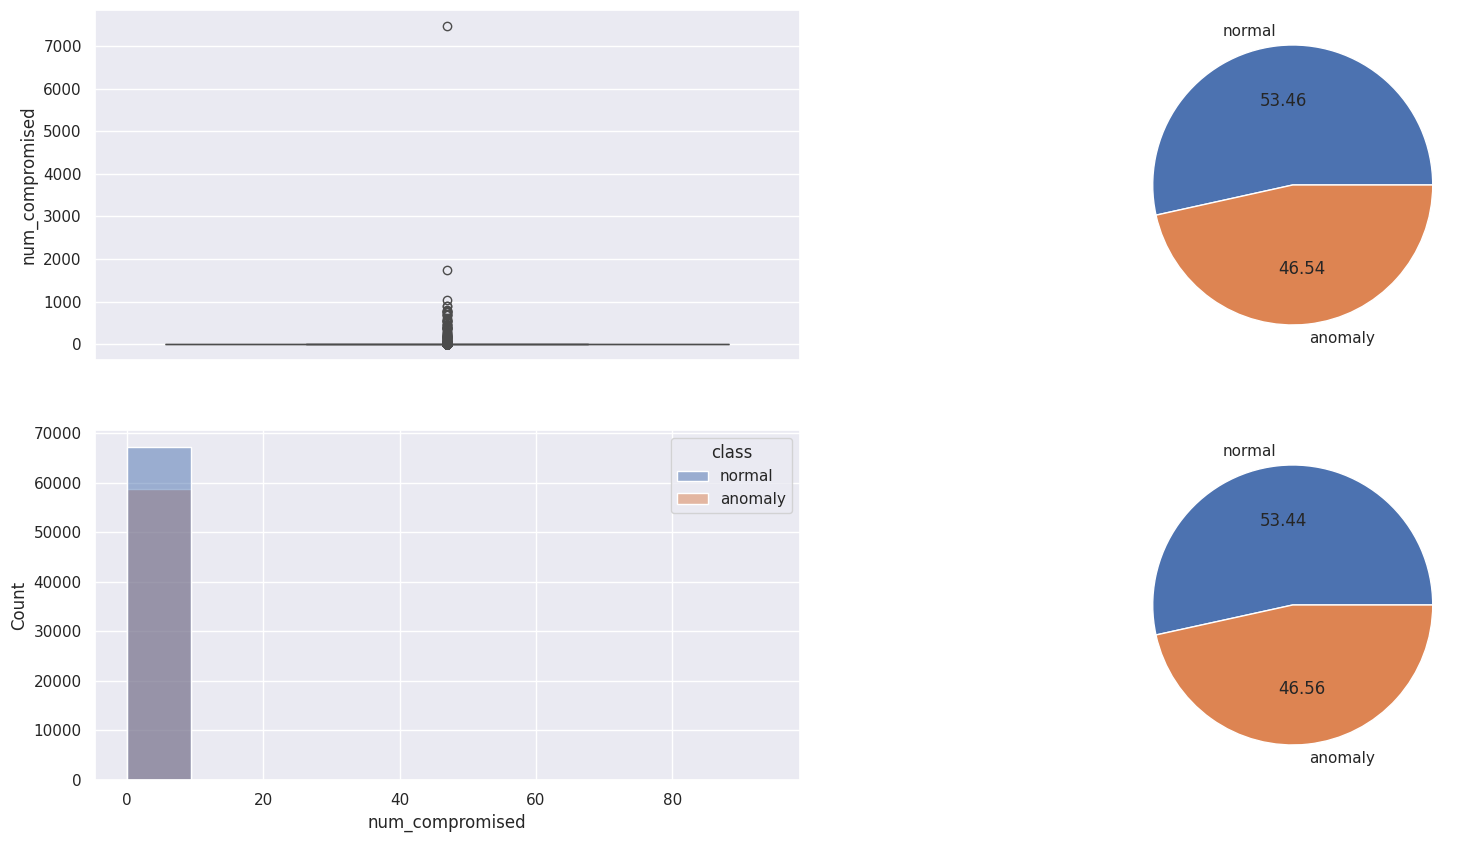

The size of data is filter: 125917


In [ ]:
visualization_data('num_compromised', 100, None)

In [ ]:
df_train.shape

(125973, 42)

Nhận xét: cần loại bỏ dữ liệu ngoại lai của cột num_compromised.

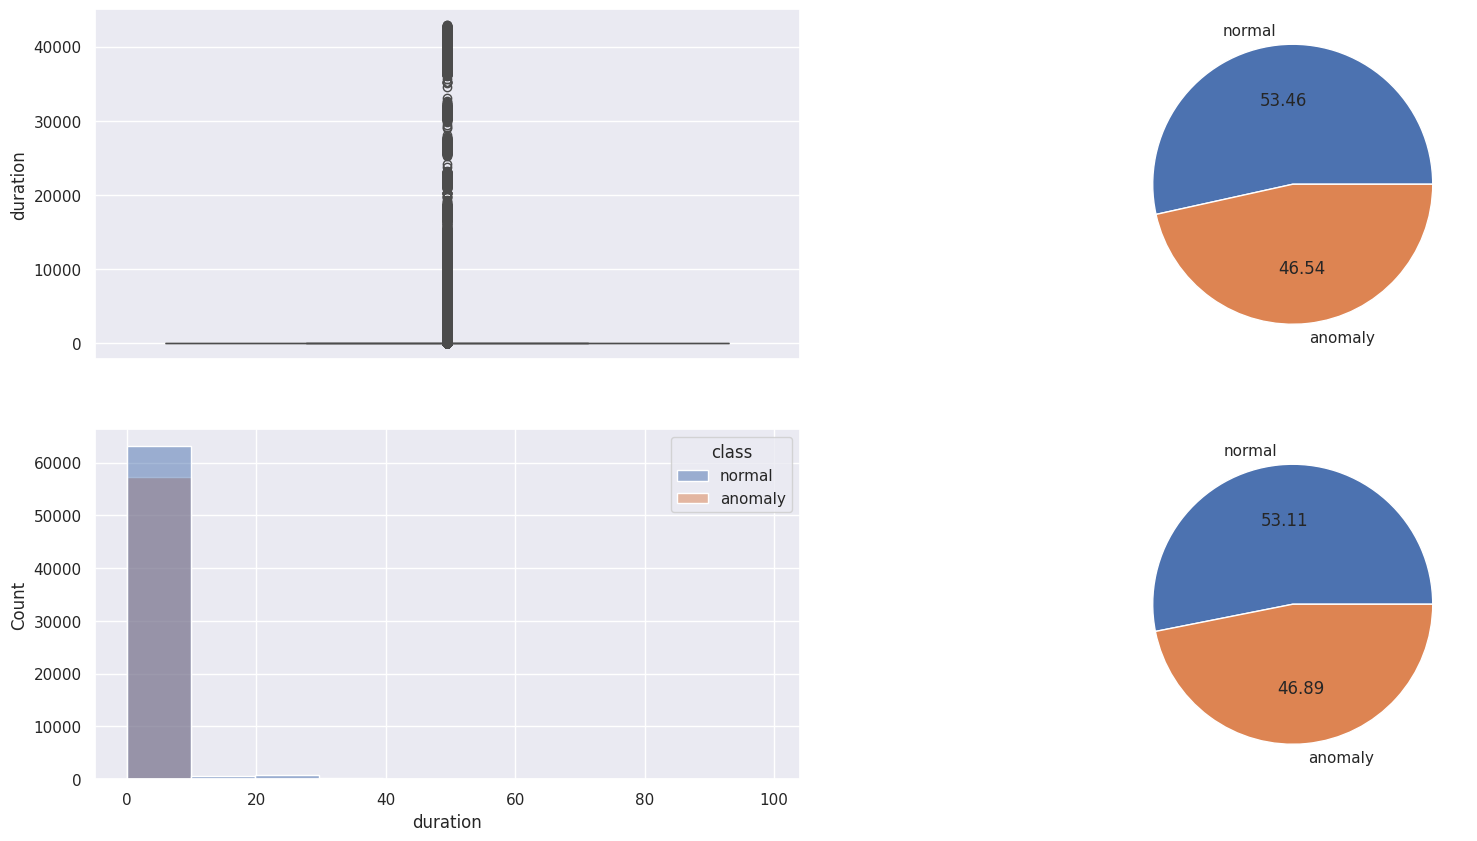

The size of data is filter: 122587


In [ ]:
visualization_data('duration', 100, None)

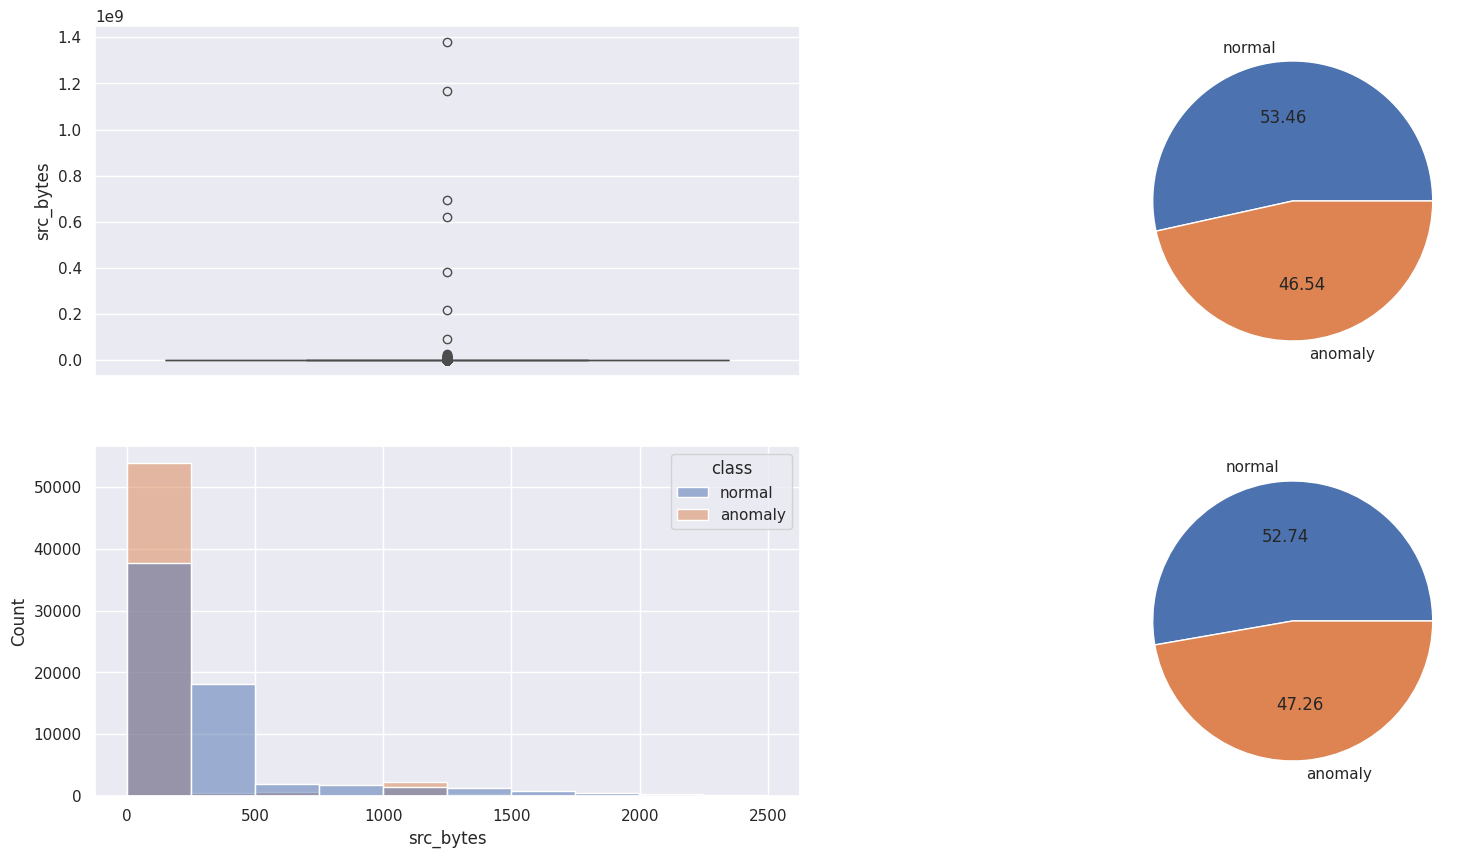

The size of data is filter: 121820


In [ ]:
visualization_data('src_bytes',2500, None)

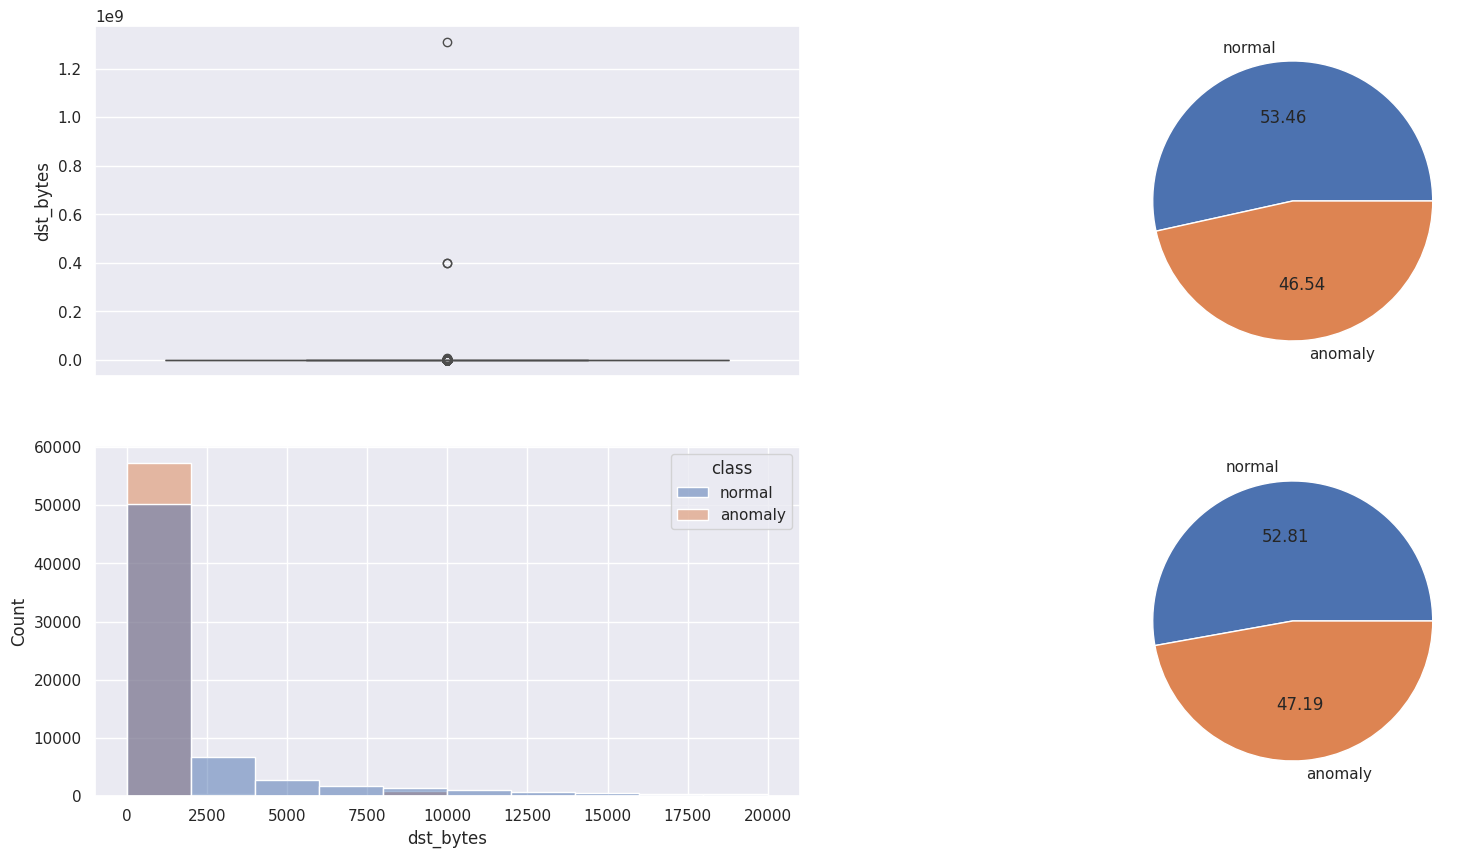

The size of data is filter: 124194


In [ ]:
visualization_data('dst_bytes',20000, None)

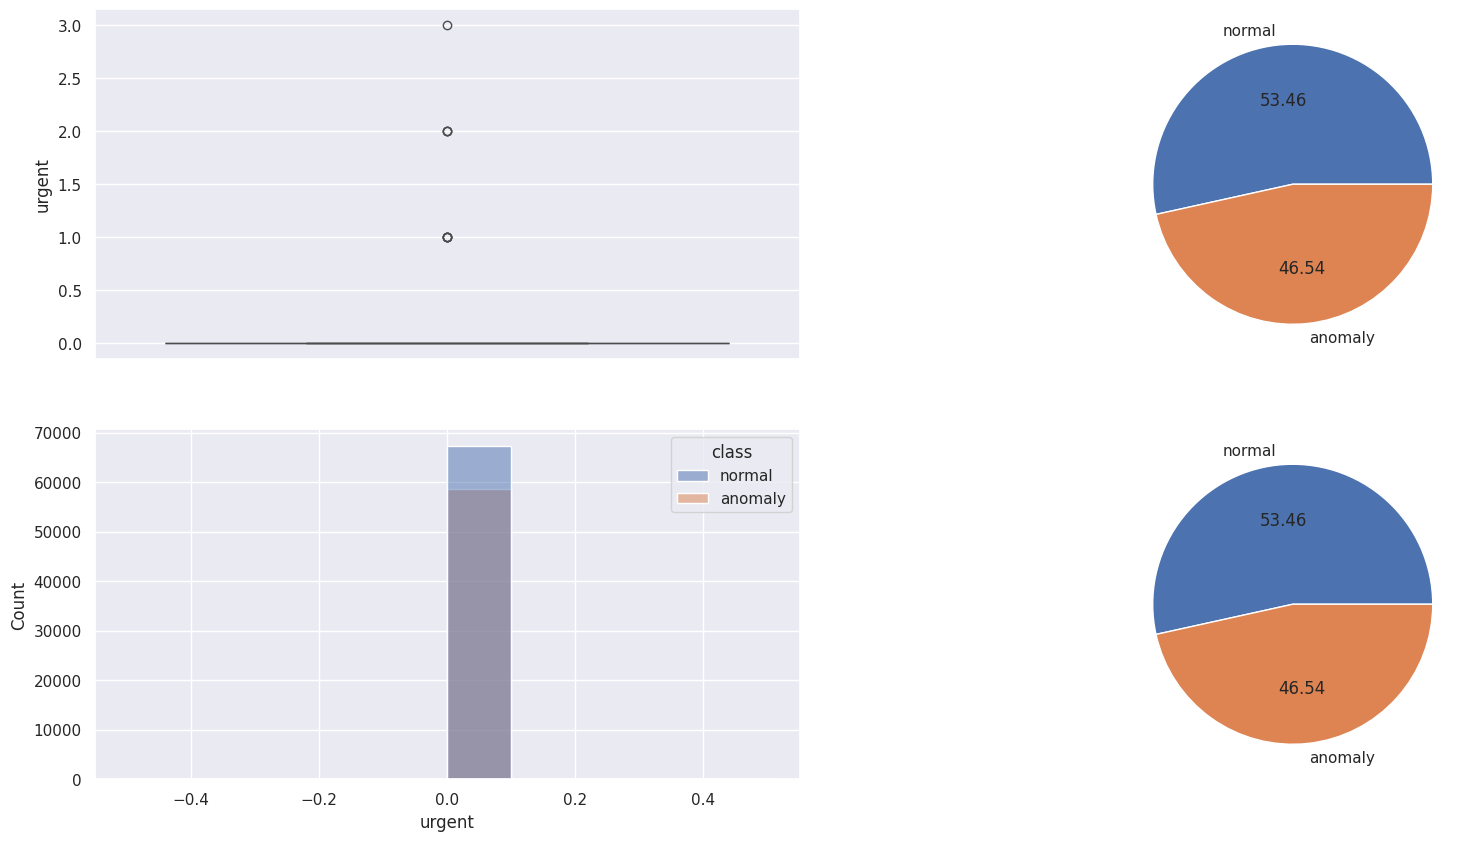

The size of data is filter: 125964


In [ ]:
visualization_data('urgent',1, None)

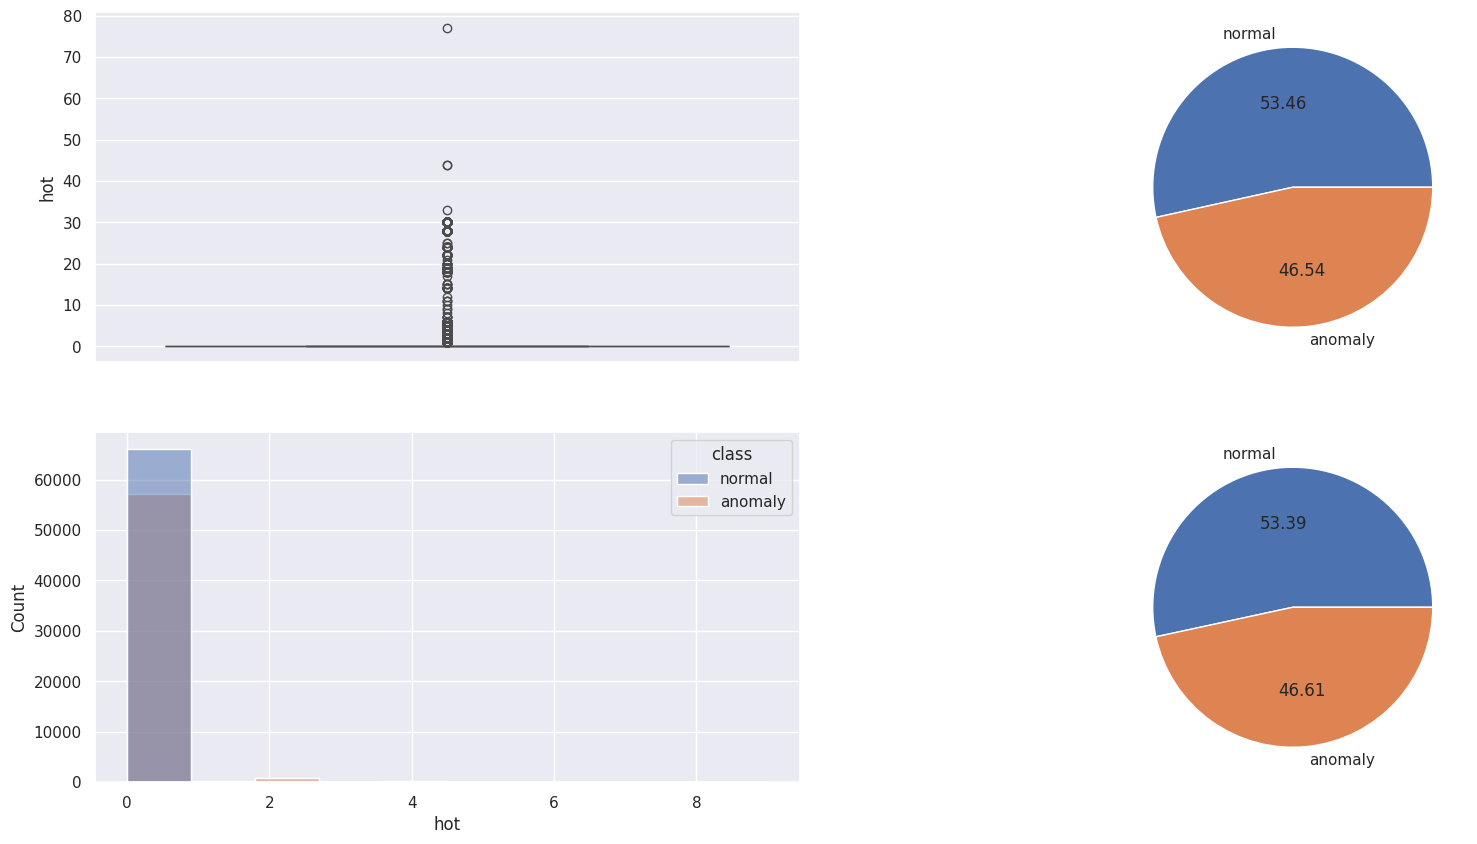

The size of data is filter: 125159


In [ ]:
visualization_data('hot', 10, None)

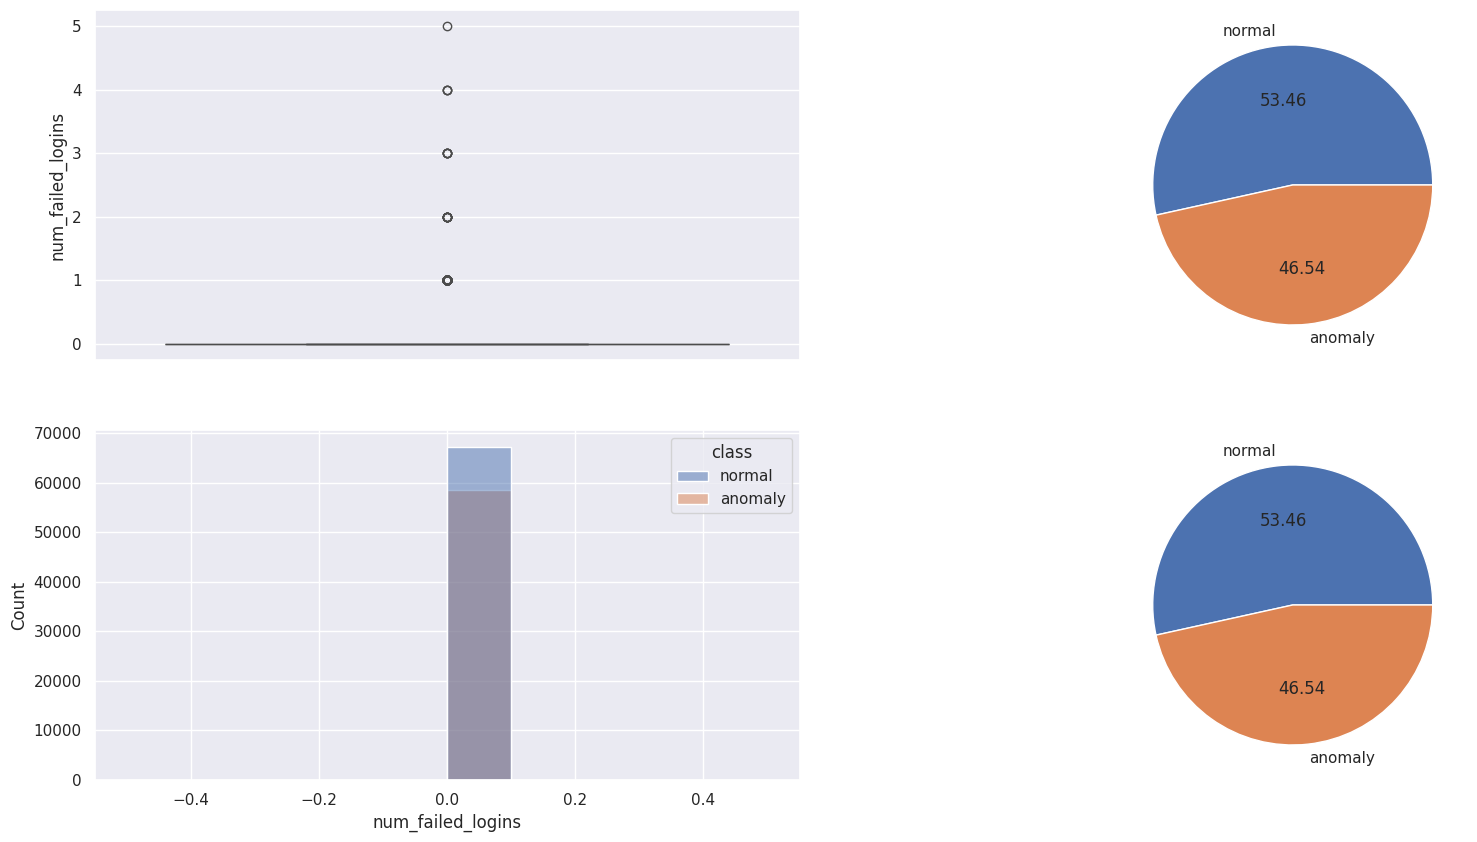

The size of data is filter: 125851


In [ ]:
visualization_data('num_failed_logins', 1, None)

# Overview file test

In [ ]:
# dataframe train

df_test = read_data_file(PATH_TEST)

# view 5 lines of surrender data
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly\n
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly\n
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal\n
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly\n
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,anomaly\n


In [ ]:
df_test[col_to_convert] = df_test[col_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_test['class'] = df_test['class'].apply(lambda strings: strings.replace("\n", ""))

# Concat data and remove data outline

Dựa vào kết quả trực quan trên em đã loại bỏ dữ liệu ngoại lai của một số cột.

In [ ]:
# concat data test and train
data_ = pd.concat([df_train, df_test], axis=0)

In [ ]:
data = data_.loc[(data_['num_compromised'] < 100), :]
# or (data_['duration'] < 100) or (data_['src_bytes'] < 2500) or (data_['dst_bytes'] < 20000) or (data_['urgent'] < 1) or (data_['hot']< 10) or (data_['num_failed_logins'] < 1), :]

In [ ]:
data.shape

(148457, 42)

In [ ]:
data = data.loc[(data['duration'] < 100), :]
data.shape

(143344, 42)

In [ ]:
data = data.loc[(data['src_bytes'] < 2500), :]
data.shape

(138431, 42)

In [ ]:
data = data.loc[(data['dst_bytes'] < 20000), :]
data.shape

(136599, 42)

In [ ]:
data = data.loc[(data['urgent'] < 1), :]
data.shape

(136592, 42)

In [ ]:
data = data.loc[(data['hot']< 10), :]
data.shape

(135801, 42)

In [ ]:
data = data.loc[(data['num_failed_logins'] < 1), :]
data.shape

(135236, 42)

# Train Test split data

## Encoder data

In [ ]:
features_to_code = data.select_dtypes('object').columns
# tao mot dictionary de encoder
encoder = {}
for feature in features_to_code:

    encode_value = {}

    unique_value = df_train[feature].unique()
    for encode in range(len(unique_value)):
        name_value = unique_value[encode]
        encode_value[name_value] = encode

    encoder[feature] = encode_value

In [ ]:
# encoder data
data = data.replace(encoder)

## Standard data

In [ ]:
from sklearn.model_selection import train_test_split, KFold

In [ ]:
data = data.to_numpy()

In [ ]:
x = data[:, :-1]
y = data[:, -1]

print("X shape: ", x.shape)
print("Y shape: ", y.shape)

X shape:  (135236, 41)
Y shape:  (135236,)


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE_TEST, random_state=43, shuffle=True)

# Building model

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Deep Learning Method

In [ ]:
def evalution_model(model, hist_model):

  fig = plt.figure(figsize=(20, 10))

  plt.subplot(1, 2, 1)
  plt.plot(hist_model.history['loss'])
  plt.plot(hist_model.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['loss train', 'Val loss'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(hist_model.history['accuracy'])
  plt.plot(hist_model.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['accuracy train', 'Val accuracy'], loc='upper left')
  plt.show()


  print("--------------------------------------------------------\n")

  model.evaluate(X_test, y_test)


def predict_confusion_matrix(model, threshold):
  predict = model.predict(X_test)
  predict_ = np.where(predict > threshold, 1.0, 0.0)
  cm = confusion_matrix(y_test, predict_)

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);
  # labels, title and ticks

  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
  plt.show()

  return predict_


def metrics_evaluate(y_test, yhat_classes):

  precision = precision_score(y_test, yhat_classes)

  recall = recall_score(y_test, yhat_classes)

  f1 = f1_score(y_test, yhat_classes)

  return precision, recall, f1

### CNN/LSTM

In [ ]:
def model_sequential():
  model = Sequential()

  model.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(41, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(70))
  model.add(Dropout(0.1))
  model.add(Dense(1, activation="sigmoid"))


  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

  return model

In [ ]:
model_lstm = model_sequential()
hist_model = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS_EX)

Epoch 1/10
2959/2959 [==============================] - 64s 21ms/step - loss: 0.0849 - accuracy: 0.9681 - val_loss: 0.0555 - val_accuracy: 0.9791
Epoch 2/10
2959/2959 [==============================] - 61s 21ms/step - loss: 0.0572 - accuracy: 0.9792 - val_loss: 0.0448 - val_accuracy: 0.9824
Epoch 3/10
2959/2959 [==============================] - 65s 22ms/step - loss: 0.0537 - accuracy: 0.9802 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 4/10
2959/2959 [==============================] - 63s 21ms/step - loss: 0.0587 - accuracy: 0.9796 - val_loss: 0.0685 - val_accuracy: 0.9723
Epoch 5/10
2959/2959 [==============================] - 62s 21ms/step - loss: 0.0556 - accuracy: 0.9809 - val_loss: 0.0589 - val_accuracy: 0.9812
Epoch 6/10
2959/2959 [==============================] - 60s 20ms/step - loss: 0.0502 - accuracy: 0.9826 - val_loss: 0.0428 - val_accuracy: 0.9855
Epoch 7/10
2959/2959 [==============================] - 61s 21ms/step - loss: 0.0562 - accuracy: 0.9802 - val_loss: 0.0501 -

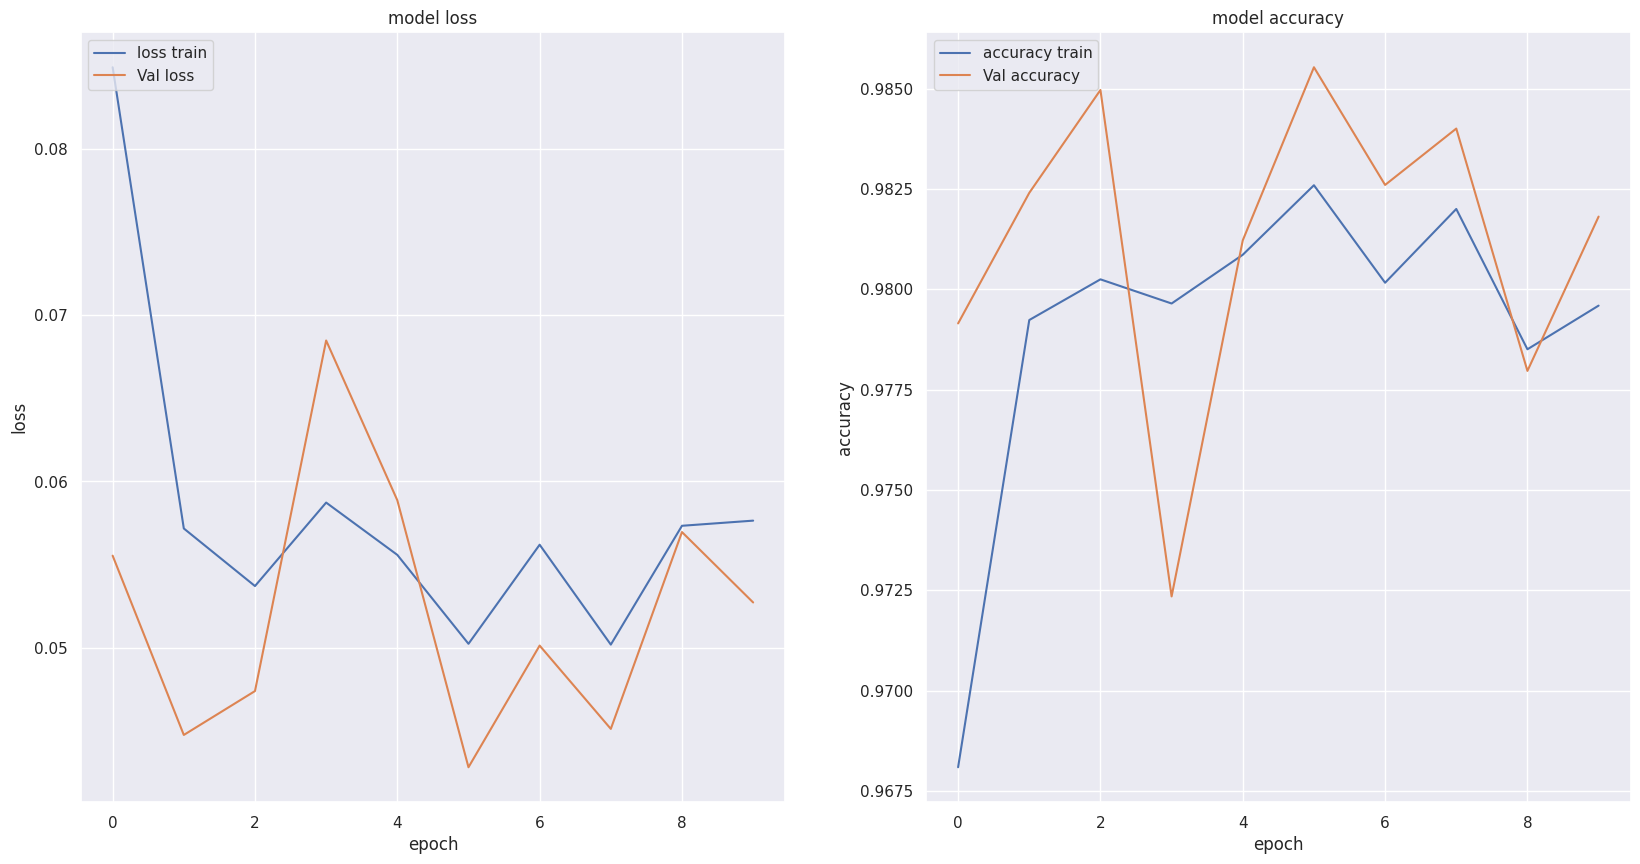

--------------------------------------------------------

1268/1268 [==============================] - 9s 7ms/step - loss: 0.0527 - accuracy: 0.9818


In [ ]:
evalution_model(model_lstm, hist_model)

1268/1268 [==============================] - 8s 6ms/step


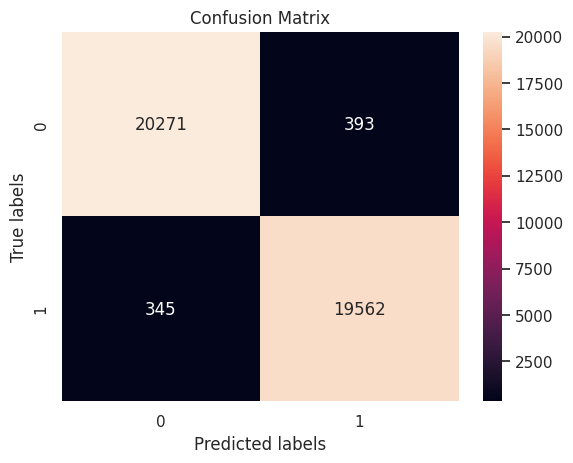

In [ ]:
predict = predict_confusion_matrix(model_lstm, 0.5)

In [ ]:
presicion_lstm, recall_lstm, f1_lstm = metrics_evaluate(predict, y_test)

print('Precision of LSTM model: %f' % presicion_lstm)
print('Recall of LSTM model: %f' % recall_lstm)
print('F1 scores of LSTM model: %f' % recall_lstm)

Precision of LSTM model: 0.982669
Recall of LSTM model: 0.980306
F1 scores of LSTM model: 0.980306


### GRU Model

In [ ]:
def GRU_model():

  model = Sequential()
  model.add(GRU(4, input_shape=(41, 1)))
  model.add(Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

  return model

In [ ]:
model_GRU = GRU_model()
hst_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS_EX)

Epoch 1/10
2959/2959 [==============================] - 65s 21ms/step - loss: 0.2468 - accuracy: 0.9101 - val_loss: 0.2106 - val_accuracy: 0.9181
Epoch 2/10
2959/2959 [==============================] - 59s 20ms/step - loss: 0.2032 - accuracy: 0.9223 - val_loss: 0.1880 - val_accuracy: 0.9290
Epoch 3/10
2959/2959 [==============================] - 60s 20ms/step - loss: 0.1868 - accuracy: 0.9297 - val_loss: 0.1682 - val_accuracy: 0.9366
Epoch 4/10
2959/2959 [==============================] - 58s 20ms/step - loss: 0.1824 - accuracy: 0.9317 - val_loss: 0.1584 - val_accuracy: 0.9419
Epoch 5/10
2959/2959 [==============================] - 61s 21ms/step - loss: 0.1759 - accuracy: 0.9343 - val_loss: 0.1847 - val_accuracy: 0.9353
Epoch 6/10
2959/2959 [==============================] - 57s 19ms/step - loss: 0.1806 - accuracy: 0.9333 - val_loss: 0.1534 - val_accuracy: 0.9436
Epoch 7/10
2959/2959 [==============================] - 57s 19ms/step - loss: 0.1749 - accuracy: 0.9347 - val_loss: 0.1593 -

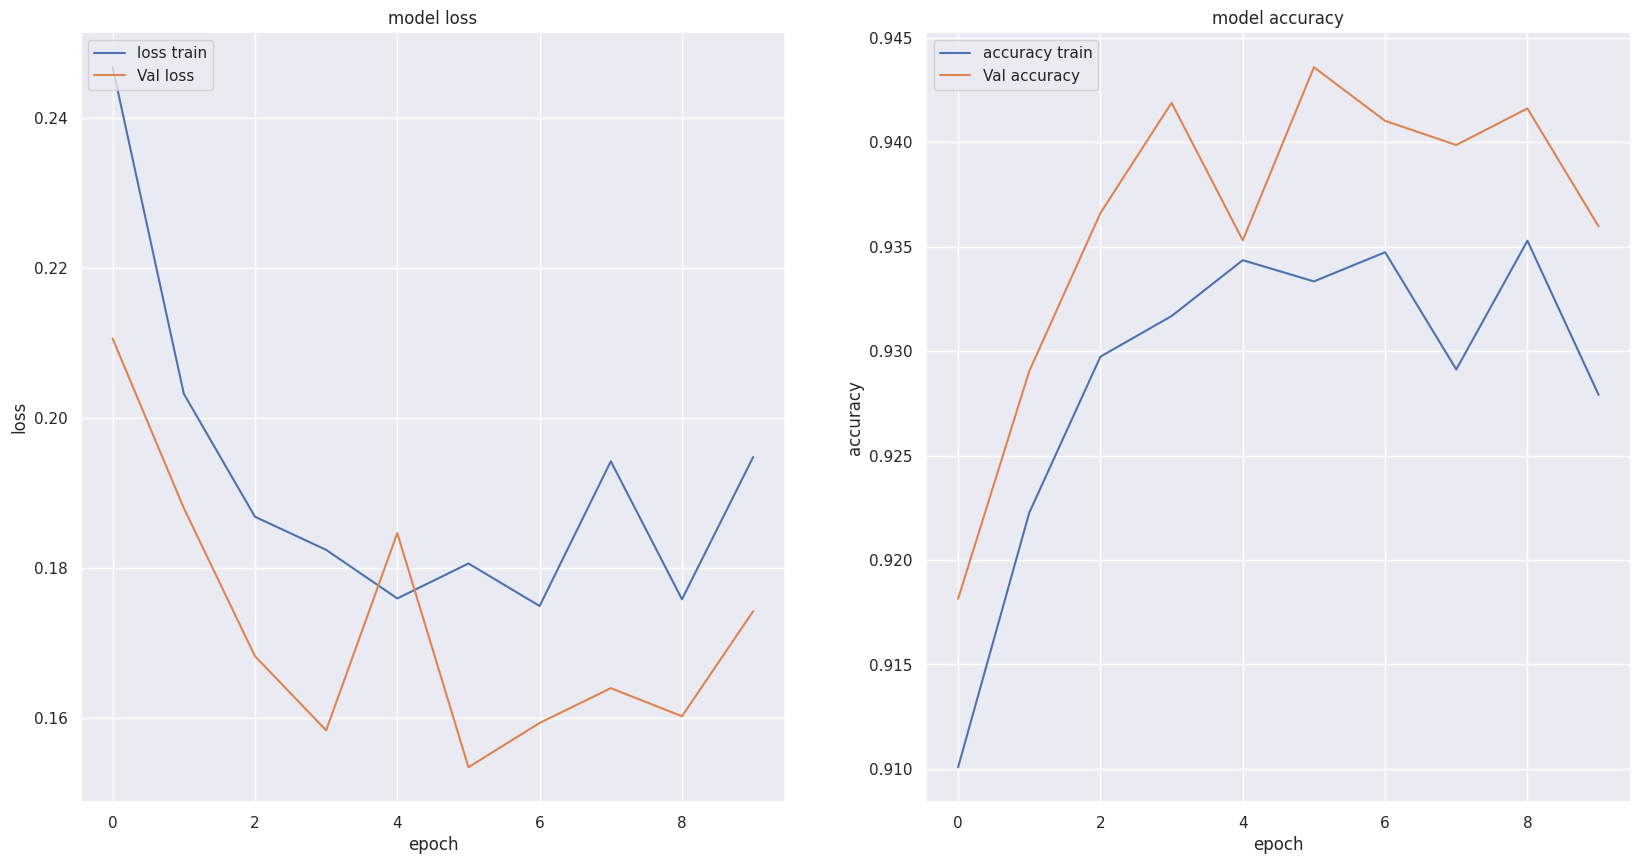

--------------------------------------------------------

1268/1268 [==============================] - 7s 6ms/step - loss: 0.1742 - accuracy: 0.9360


In [ ]:
evalution_model(model_GRU, hst_GRU)

1268/1268 [==============================] - 6s 4ms/step


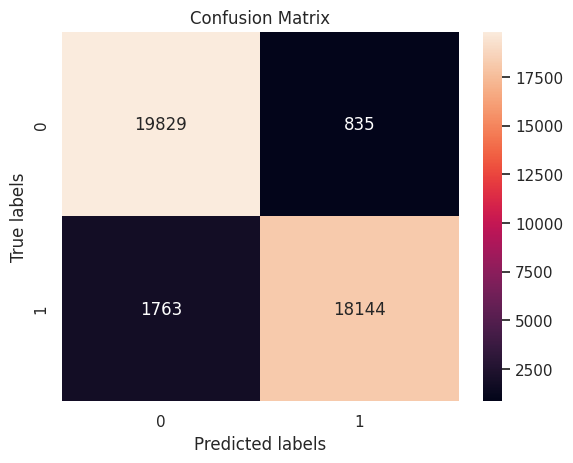

In [ ]:
predict = predict_confusion_matrix(model_GRU, 0.5)

In [ ]:
presicion_GRU, recall_GRU, f1_GRU = metrics_evaluate(predict, y_test)

print('Precision of GRU model: %f' % presicion_GRU)
print('Recall of GRU model: %f' % recall_GRU)
print('F1 scores of GRU model: %f' % f1_GRU)

Precision of GRU model: 0.911438
Recall of GRU model: 0.956004
F1 scores of GRU model: 0.933189


### CNN

In [ ]:
def CNN_model():

  model = Sequential()

  model.add(Convolution1D(64, 3, padding="same", activation='relu', input_shape=(41, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  opt = keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

  return model

In [ ]:
model_cnn = CNN_model()

hst_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
2959/2959 [==============================] - 29s 9ms/step - loss: 0.0638 - accuracy: 0.9786 - val_loss: 0.0370 - val_accuracy: 0.9876
Epoch 2/50
2959/2959 [==============================] - 17s 6ms/step - loss: 0.0407 - accuracy: 0.9862 - val_loss: 0.0344 - val_accuracy: 0.9894
Epoch 3/50
2959/2959 [==============================] - 17s 6ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0359 - val_accuracy: 0.9901
Epoch 4/50
2959/2959 [==============================] - 20s 7ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0296 - val_accuracy: 0.9908
Epoch 5/50
2959/2959 [==============================] - 18s 6ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0321 - val_accuracy: 0.9891
Epoch 6/50
2959/2959 [==============================] - 18s 6ms/step - loss: 0.0315 - accuracy: 0.9907 - val_loss: 0.0318 - val_accuracy: 0.9904
Epoch 7/50
2959/2959 [==============================] - 18s 6ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.0278 - val_ac

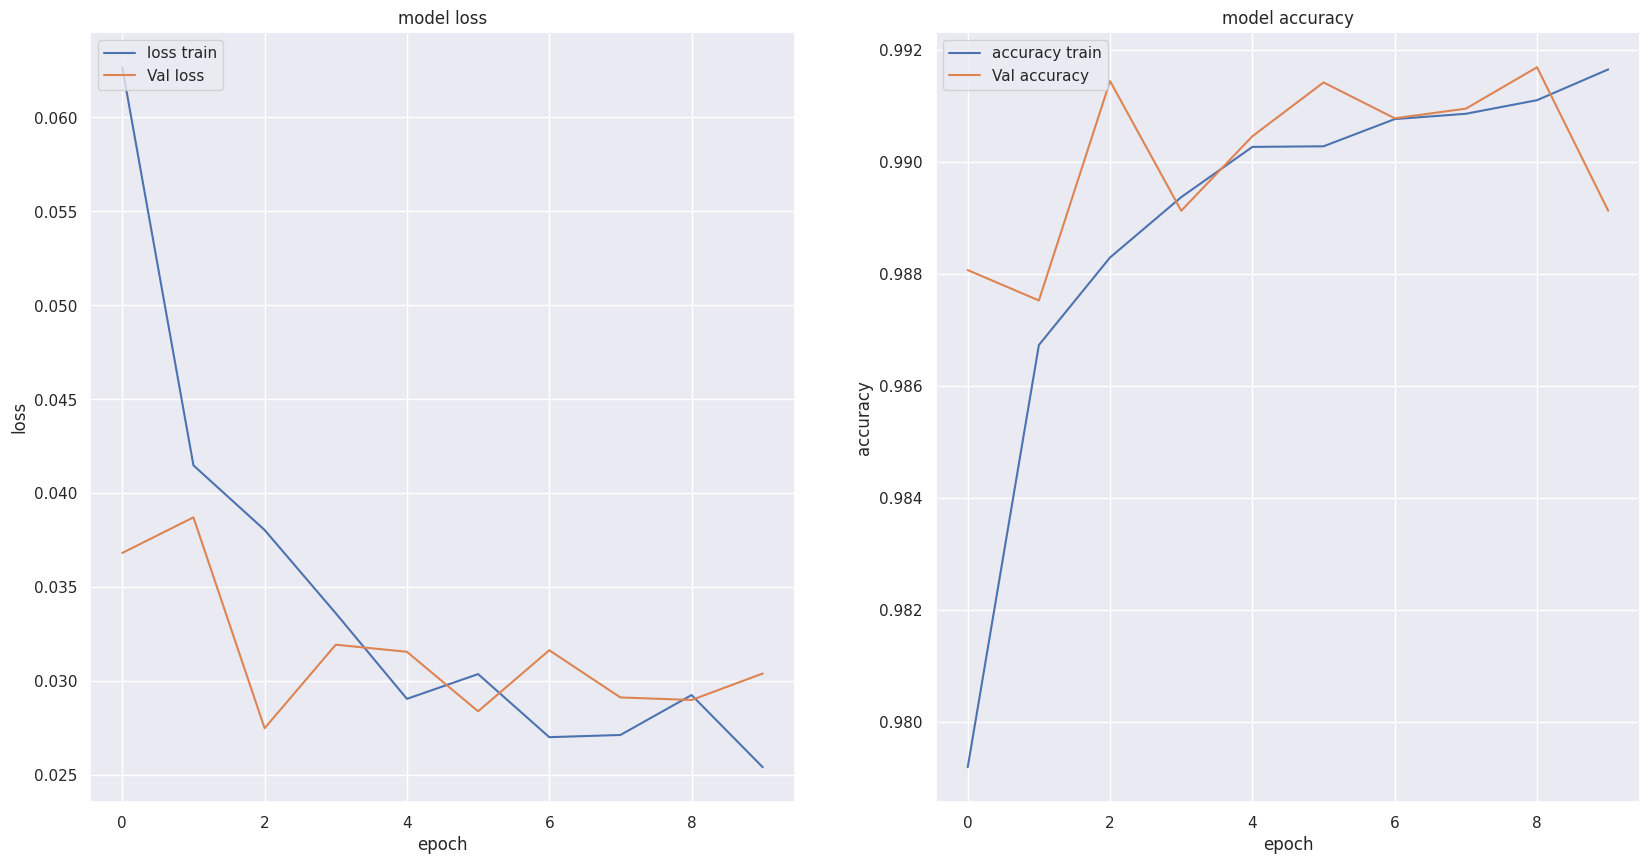

--------------------------------------------------------

1268/1268 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9891


In [ ]:
evalution_model(model_cnn, hst_cnn)

1268/1268 [==============================] - 4s 3ms/step


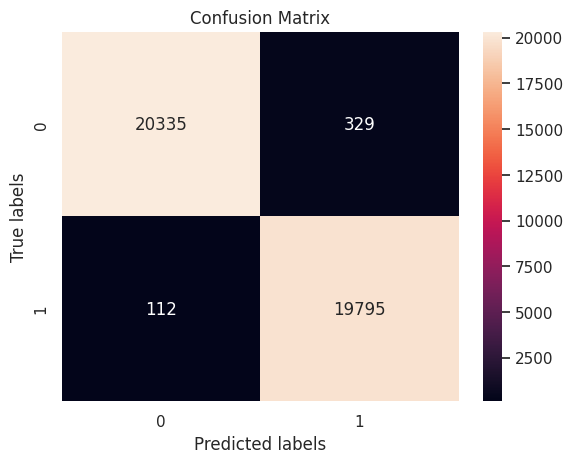

In [ ]:
predict = predict_confusion_matrix(model_cnn, 0.5)

In [ ]:
presicion_CNN, recall_CNN, f1_CNN = metrics_evaluate(predict, y_test)

print('Precision of CNN model: %f' % presicion_CNN)
print('Recall of CNN model: %f' % recall_CNN)
print('F1 scores of CNN model: %f' % f1_CNN)

Precision of CNN model: 0.994374
Recall of CNN model: 0.983651
F1 scores of CNN model: 0.988984


### CNN/LSTM 2

In [ ]:
def model_sequential():
    model = Sequential()

    model.add(Convolution1D(64, 3, padding="same",activation="relu",input_shape=(41, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Convolution1D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(70, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(40))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))


    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

    return model

In [ ]:
model_cnn_lstm = model_sequential()

hst_cnn_lstm = model_cnn_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS_EX)

Epoch 1/10
2959/2959 [==============================] - 76s 24ms/step - loss: 0.0895 - accuracy: 0.9666 - val_loss: 0.0573 - val_accuracy: 0.9781
Epoch 2/10
2959/2959 [==============================] - 71s 24ms/step - loss: 0.0789 - accuracy: 0.9702 - val_loss: 0.0899 - val_accuracy: 0.9673
Epoch 3/10
2959/2959 [==============================] - 70s 24ms/step - loss: 0.0878 - accuracy: 0.9662 - val_loss: 0.0587 - val_accuracy: 0.9782
Epoch 4/10
2959/2959 [==============================] - 70s 24ms/step - loss: 0.0880 - accuracy: 0.9667 - val_loss: 0.0619 - val_accuracy: 0.9772
Epoch 5/10
2959/2959 [==============================] - 69s 23ms/step - loss: 0.1040 - accuracy: 0.9605 - val_loss: 0.0729 - val_accuracy: 0.9713
Epoch 6/10
2959/2959 [==============================] - 72s 24ms/step - loss: 0.1016 - accuracy: 0.9607 - val_loss: 0.0876 - val_accuracy: 0.9669
Epoch 7/10
2959/2959 [==============================] - 70s 24ms/step - loss: 0.0994 - accuracy: 0.9625 - val_loss: 0.0796 -

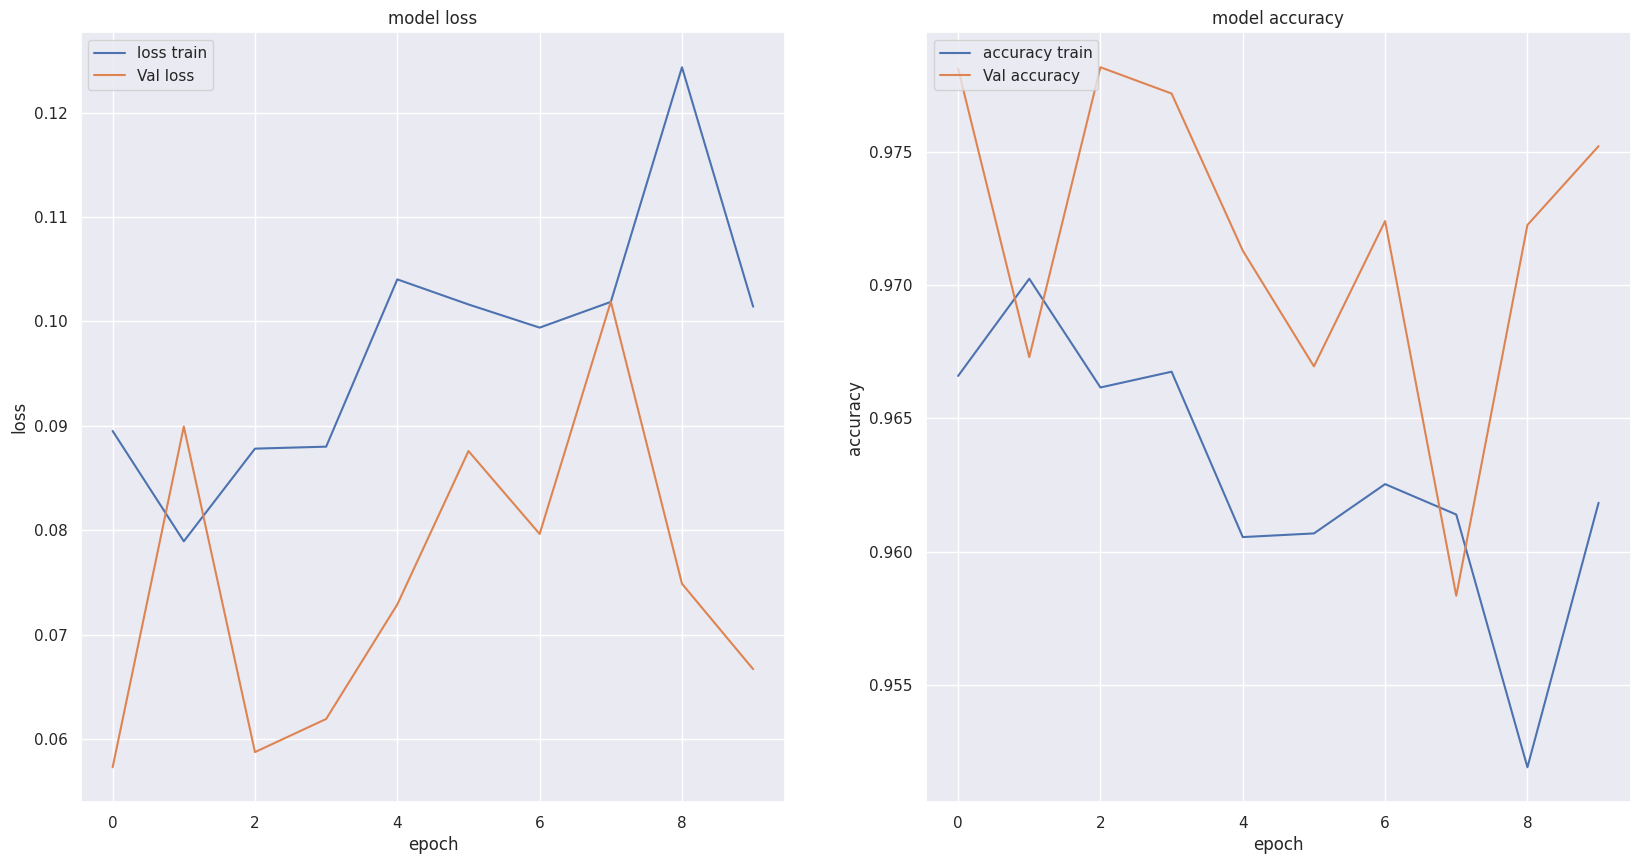

--------------------------------------------------------

1268/1268 [==============================] - 9s 7ms/step - loss: 0.0667 - accuracy: 0.9752


In [ ]:
evalution_model(model_cnn_lstm, hst_cnn_lstm)

1268/1268 [==============================] - 9s 6ms/step


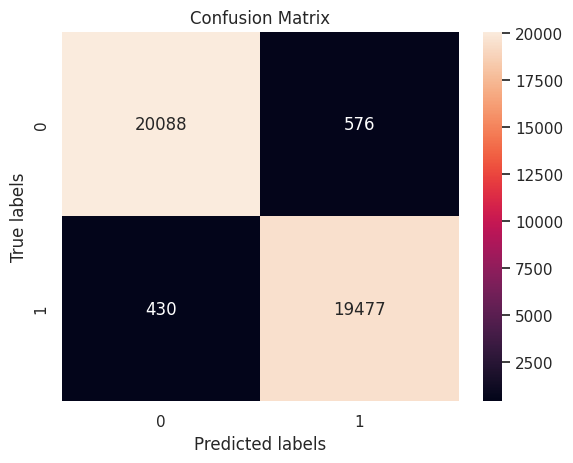

In [ ]:
predict = predict_confusion_matrix(model_cnn_lstm, 0.5)

In [ ]:
presicion_CNN_LSTM, recall_CNN_LSTM, f1_CNN_LSTM = metrics_evaluate(predict, y_test)

print('Precision of CNN_LSTM model: %f' % presicion_CNN_LSTM)
print('Recall of CNN_LSTM model: %f' % recall_CNN_LSTM)
print('F1 scores of CNN_LSTM model: %f' % f1_CNN_LSTM)

Precision of CNN_LSTM model: 0.978400
Recall of CNN_LSTM model: 0.971276
F1 scores of CNN_LSTM model: 0.974825


Dựa vào kết quả đánh giá mô hình trên model CNN là model có độ chính xác cao nhất.

## Machine Learning Method

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
N_neighbors = range(3, 20)
accuracy_train = []
accuracy_test = []

for n in N_neighbors:

  # Training model
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, y_train)

  # append accuracy in list
  score_accuracy_train = neigh.score(X_train, y_train)
  score_accuracy_test = neigh.score(X_test, y_test)

  accuracy_train.append(score_accuracy_train)
  accuracy_test.append(score_accuracy_test)


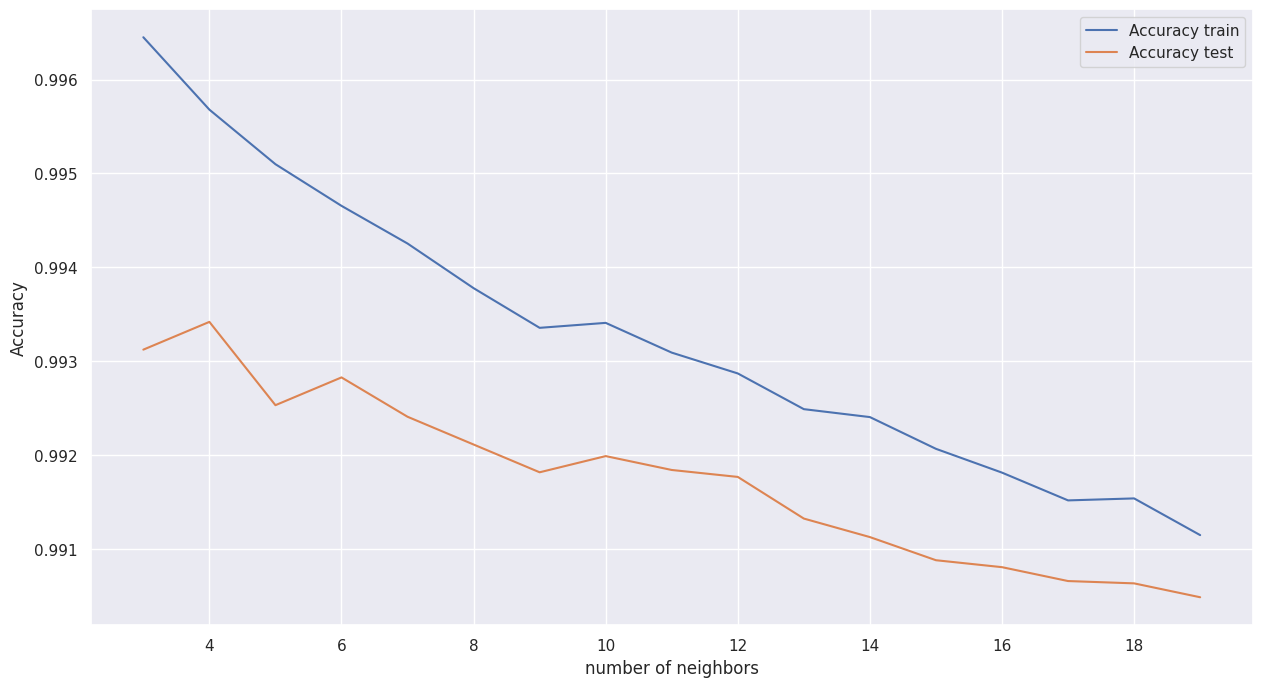

In [ ]:
fig = plt.figure(figsize=(15, 8))

plt.plot(N_neighbors, accuracy_train, label="Accuracy train")
plt.plot(N_neighbors, accuracy_test, label="Accuracy test")
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()

ta chọn cụm ở chỗ gấp khúc của accuracy train và test

In [ ]:
neigh_model = KNeighborsClassifier(n_neighbors=9)
neigh_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
accuracy_test = neigh_model.score(X_test, y_test)

print("Accuracy model KNN: {}".format(accuracy_test*100))

Accuracy model KNN: 99.18168149663553


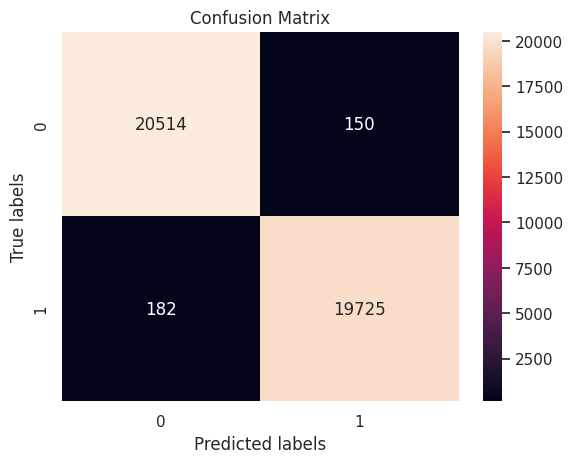

In [ ]:
predict = predict_confusion_matrix(neigh_model, 0.5)

In [ ]:
presicion_knn, recall_knn, f1_knn = metrics_evaluate(predict, y_test)

print('Precision of knn model: %f' % presicion_knn)
print('Recall of knn model: %f' % recall_knn)
print('F1 scores of knn model: %f' % f1_knn)

Precision of knn model: 0.990857
Recall of knn model: 0.992453
F1 scores of knn model: 0.991655


### Logistics Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = clf_logistic.predict(X_test)
acc = accuracy_score(y_test, y_predict)
print("Logistic Regression model accuracy {}%".format(acc*100))

Logistic Regression model accuracy 95.58305193364718%


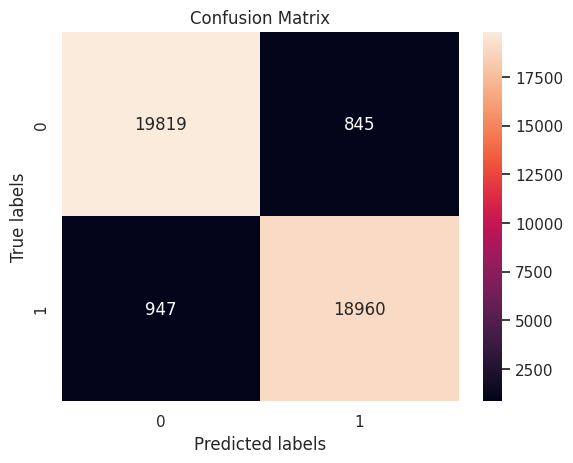

In [ ]:
predict = predict_confusion_matrix(clf_logistic, 0.5)

In [ ]:
presicion_lg, recall_lg, f1_lg = metrics_evaluate(predict, y_test)

print('Precision of lg model: %f' % presicion_lg)
print('Recall of lg model: %f' % recall_lg)
print('F1 scores of lg model: %f' % f1_lg)

Precision of lg model: 0.952429
Recall of lg model: 0.957334
F1 scores of lg model: 0.954875


### Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
y_predict = tree_clf.predict(X_test)


accuracy_tree = accuracy_score(y_test, y_predict)

print("Decision tree model accuracy {}%".format(accuracy_tree*100))

Decision tree model accuracy 99.521825934781%


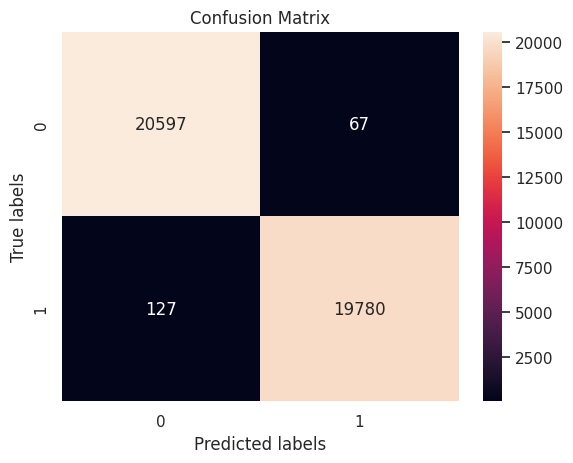

In [ ]:
predict = predict_confusion_matrix(tree_clf, 0.5)

In [ ]:
presicion_dtree, recall_dtree, f1_dtree = metrics_evaluate(predict, y_test)

print('Precision of dtree model: %f' % presicion_dtree)
print('Recall of dtree model: %f' % recall_dtree)
print('F1 scores of dtree model: %f' % f1_dtree)

Precision of dtree model: 0.993620
Recall of dtree model: 0.996624
F1 scores of dtree model: 0.995120


### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC()

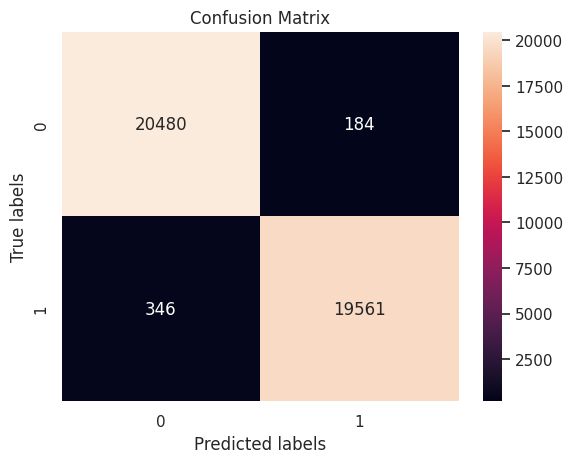

[1. 1. 0. ... 0. 0. 1.]


In [ ]:
predict = predict_confusion_matrix(clf, 0.5)
print(predict)

In [ ]:
presicion_svm, recall_svm, f1_svm = metrics_evaluate(predict, y_test)

print('Precision of svm model: %f' % presicion_svm)
print('Recall of svm model: %f' % recall_svm)
print('F1 scores of svm model: %f' % f1_svm)

Precision of svm model: 0.982619
Recall of svm model: 0.990681
F1 scores of svm model: 0.986634


# use k fold cross validation

## Model deep learning

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=N_FOLDER, shuffle=True)

In [ ]:
fold_no = 1
no_epochs = EPOCHS_FOLDER
avg_accuracy = 0
for train, test in kfold.split(X, y):

    # choice model CNN to test k fold cross
    model = CNN_model()

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history_model = model.fit(X[train], y[train],
                        validation_data=(X[test], y[test]),
                        epochs=no_epochs)


    scores = model.evaluate(X[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1
    avg_accuracy += scores[1]

print("Average of the accuracy of the validation data set: {}".format(avg_accuracy/N_FOLDER))

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
3804/3804 [==============================] - 28s 7ms/step - loss: 0.0604 - accuracy: 0.9806 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 2/10
3804/3804 [==============================] - 28s 7ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0328 - val_accuracy: 0.9891
Epoch 3/10
3804/3804 [==============================] - 28s 7ms/step - loss: 0.0333 - accuracy: 0.9889 - val_loss: 0.0354 - val_accuracy: 0.9893
Epoch 4/10
3804/3804 [==============================] - 28s 7ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0288 - val_accuracy: 0.9903
Epoch 5/10
3804/3804 [==============================] - 30s 8ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0329 - val_accuracy: 0.9877
Epoch 6/10
3804/3804 [==============================] - 29s 8ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0303 - val_accuracy: 0.9925
Epoch 7/10
3804/3804 [===========

## Model Machine learning

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def predict_model(model, X_test, Y_test):

  predict = model.predict(X_test)
  mae_score = mean_absolute_error(Y_test, predict)
  acc = accuracy_score(predict, Y_test)

  return acc, mae_score

### KNN

In [ ]:
fold_no = 1
no_epochs = EPOCHS_FOLDER
avg_accuracy = 0
for train, test in kfold.split(X, y):

    # choice model CNN to test k fold cross
    model = KNeighborsClassifier(n_neighbors=9)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model.fit(X[train], y[train])


    scores, mae_error = predict_model(model, X[test], y[test])


    print('Score for fold {}: Loss mean absolute error: {}, accuracy score: {}'.format(fold_no, mae_error, scores))
    fold_no += 1
    avg_accuracy += scores

print("Average of the accuracy of the validation data set: {}".format(avg_accuracy/N_FOLDER))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: Loss mean absolute error: 0.006580893226855959, accuracy score: 0.993419106773144
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: Loss mean absolute error: 0.007172434191067731, accuracy score: 0.9928275658089323
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: Loss mean absolute error: 0.007985803016858917, accuracy score: 0.9920141969831411
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: Loss mean absolute error: 0.007690032534753032, accuracy score: 0.992309967465247
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: Loss mean absolute error: 0.005841467021591245, accuracy score: 0.9941585329784087
------------

### Decision Tree

In [ ]:
fold_no = 1
no_epochs = EPOCHS_FOLDER
avg_accuracy = 0
for train, test in kfold.split(X, y):

    # choice model decision tree to test k fold cross
    model = DecisionTreeClassifier(criterion='entropy', max_depth=10)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model.fit(X[train], y[train])


    scores, mae_error = predict_model(model, X[test], y[test])


    print('Score for fold {}: Loss mean absolute error: {}, accuracy score: {}'.format(fold_no, mae_error, scores))
    fold_no += 1
    avg_accuracy += scores

print("Average of the accuracy of the validation data set: {}".format(avg_accuracy/N_FOLDER))

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: Loss mean absolute error: 0.004658385093167702, accuracy score: 0.9953416149068323
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: Loss mean absolute error: 0.004140786749482402, accuracy score: 0.9958592132505176
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: Loss mean absolute error: 0.0037710736468500442, accuracy score: 0.99622892635315
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: Loss mean absolute error: 0.004658385093167702, accuracy score: 0.9953416149068323
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: Loss mean absolute error: 0.0049541555752735875, accuracy score: 0.9950458444247264
----------

**Nhận xét:**: Nhìn chung mô hình Machine Learning tốt hơn mô hình sử dụng Deep Learning. Nhưng mô hình Deep Learning (CNN) cho kết quả phù hợp hơn các mô hình machine learning đánh giá dựa trên độ chính xác của mô hình và confusion matrix trong bài toán nhận diện tấn công mạng:<br>   

*   Đối với bài toán nhận diện tấn công mạng thì việc mô hình cho ra kết quả dự đoán có tấn công mạng (label = 1) nhưng kết quả thực là không tấn công mạng (label = 0) cao hơn so với mô hình dự đoán kết quả không tấn công mạng (label = 0) nhưng kết quả thực là có (label =1). Điều này cho thấy mô hình đảm bảo sự an toàn hơn sơ với các mô hình thử nghiệm trên.
*   Độ chính xác của mô hình CNN deep learning cũng đạt độ chính xác cao.



# Save model

In [ ]:
!pip install h5py

In [ ]:
import h5py

In [ ]:
model_json = model_cnn.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Lưu trọng số của mô hình
model_cnn.save_weights("weights.h5")

In [ ]:
# Để tải lại kiến trúc và trọng số:
from keras.models import model_from_json
with open("model.json", "r") as json_file:
    loaded_model_json = json_file.read()

In [ ]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 164353 (642.00 KB)
Trainable params: 164353 (642.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Load trọng số vào mô hình đã tạo
weight = "weights.h5"

loaded_model.load_weights(weight)

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 41, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 20, 64)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 164353 (642.00 KB)
Trainable params: 164353 (642.00 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
input_data = X_test[0, :]
label_data = y_test[0]

print(type(input_data))
print(label_data)

<class 'numpy.ndarray'>
0.0


In [ ]:
input_data1 = input_data.reshape(-1, len(input_data))

In [ ]:
predictions = loaded_model.predict(input_data1)

1/1 [==============================] - 0s 62ms/step


In [ ]:
predictions.item()

0.6574965715408325

# Deployment models.

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask, request, jsonify


from flask import Flask
from flask_ngrok import run_with_ngrok

In [ ]:
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))

172.28.0.12


In [ ]:
app = Flask(__name__)




def prepare_input(data):

  data = np.array(data)
  data = data.reshape(-1, len(data))
  return data

@app.route('/')
def predict():

  data = request.json['data']

  input_data = prepare_input(data)

  predictions = loaded_model.predict(input_data)

  # return jsonify({'preidicted_class': predictions.item() })
  strings = str(predictions.item())
  return strings


OSError: [Errno 98] Address already in use